# TP1-Image Properties, Intensity Transformations and Morphological Operations
** ATRIM - Option DATASIM - Ecole Centrale Nantes **

** Diana Mateus **

Participants: (Maria Clara VALLE et Abbass ZAHRAMAN)



### Objectives

The goal of this lab session is to understand and implement:
- measures to quantitatively characterize an image
- intensity transformations visualizing their effect on the images and their histograms
- typical morphological operations  




## 0. Preparation


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage.io as io
import numpy.random


__Read and display the images in the provided folders__

Download and unzip the images folder.  If everything goes well, the following code will loop over the images and show them on the screen. If no image shows up, it is likely that the file path is erroneous.

In [ ]:
#If using colab
#from google.colab import drive
#drive.mount('/content/drive/')

In [38]:
IMDIR = r"C:\Users\maria\DataSim\ATRIM\TP1-code-and-images\TP1-code-and-images" #"/Replace/With/Your/Filepath"
print(os.listdir(IMDIR))

['.ipynb_checkpoints', 'ballons.jpg', 'chestXray', 'Completé _TP1-ATRIM-image-transformations-SV_.ipynb', 'equalize', 'histograms', 'morphology', 'psnr', 'threshold.jpg', 'TP1-ATRIM-image-transformations-SV.ipynb']


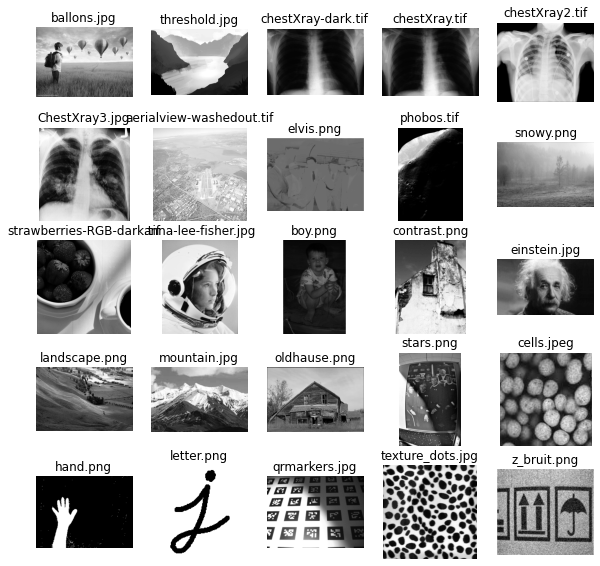

In [6]:

#The following lines control how big the images are shown on the screen
width=10
height=10
plt.rcParams['figure.figsize'] = [width, height]


#we create a figure
fig=plt.figure()

#and look for all available image files in IMDIR
im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename)

        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):

            # uncomment the next line to print the file paths if no image is being shown
            # print(filename)

            # read the image
            im = io.imread(f,as_gray=True)

            if im_counter > 25: #showing maximum 25 images
                break

            # display it
            plt.subplot(5,5,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            im_counter +=1


plt.show()



# 1. Global Measures

### 1.1. Image histograms and global measures

**a)** Create a function that measures the luminance and contrast of an image.

**b)** Create a function to compute and visualize the histogram AND the cummulative histogram of an image,

*Hint:* You can use ``np.histogram`` or implement your own. In the first case, to plot with ``plt.plot`` you may need to compute the bin centers from the bin limits to make the dimensions of the histogram and the bins match.
```python
def image_histogram(input_image, plot_me=True):
    hist, bin_limits = np.histogram(input_image, bins=256)
    hist = hist/(input_image.shape[0]*input_image.shape[1])#np.max(hist[:])
    bin_centers = 0.5*(bin_limits[:-1] + bin_limits[1:])
    return bin_centers,hist


def cummulative_histogram(?):
    ???
    return ???

```

**c)** Apply the provided shuffle function, which recieves a grayscale image, shuffles its pixels and returns the shuffled image.

*It uses:*
```python
np.random.shuffle(im.ravel())
```
**d)**
Loop over the images in the ``chestXRay`` folder and apply the shuffle function. For each image (before AND after shuffling)
- print the size of the image
- print its min, max values
- print the computed luminance and contrast.
- plot the image before and after the shuffling
- plot the histogram and cummulative histogram before and after the shuffling
*Hint"* use
``plt.subplot`` to plot several plots in a single figure

**e)** Explain your observations


In [7]:
#4students
import skimage.metrics as metrics

#Only defined for grayscale images
def shuffle_image(im_gray):
    im_shuffle = im_gray.ravel().copy()
    np.random.shuffle(im_shuffle)
    im_shuffle=np.reshape(im_shuffle, im_gray.shape)
    return im_shuffle

In [16]:
# define the functions here
def contrast(image):
    max = np.max(image)
    min = np.min(image)
    return (max - min)/(max+min)

def luminance(image):
    mean = np.mean(image)
    return mean

def image_histogram(input_image, plot_me=True):
    hist, bin_limits = np.histogram(input_image, bins=256)
    hist = hist/(input_image.shape[0]*input_image.shape[1])#np.max(hist[:])
    bin_centers = 0.5*(bin_limits[:-1] + bin_limits[1:])
    if plot_me:
        plt.plot(bin_centers, hist/np.max(hist[:]))
    
    return bin_centers,hist

def cummulative_histogram(input_image,plot_me=True):
    bin_centers, hist = image_histogram(input_image, False)
    for i in range(1, len(hist)):
        hist[i] = hist[i] + hist[i-1]
    if plot_me:
        plt.plot(bin_centers, hist/np.max(hist))

    return bin_centers,hist

ORIGINAL
0.9739130434782609
0.23562012542860697
251636
0.8901960784313725
0.011764705882352941


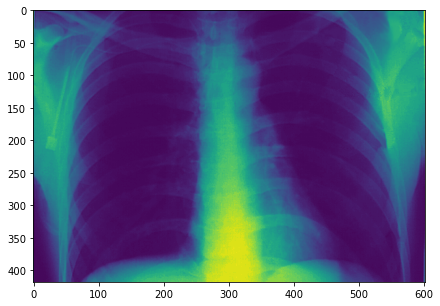

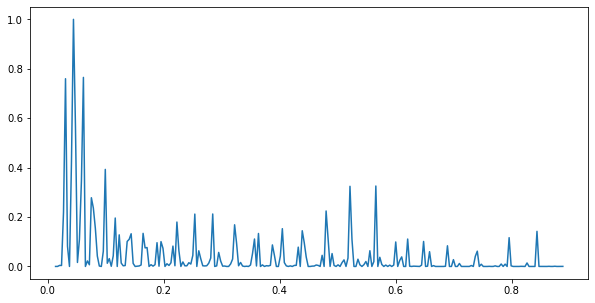

cumulative


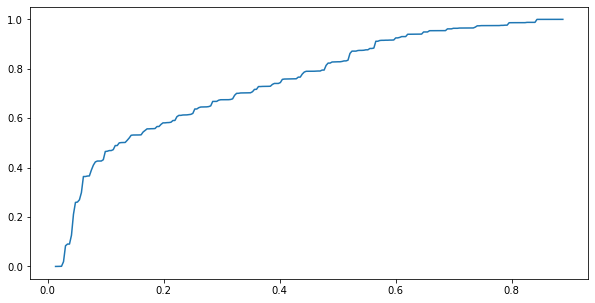

SHUFFLED
0.9739130434782609
0.2356201254286069
251636
0.8901960784313725
0.011764705882352941


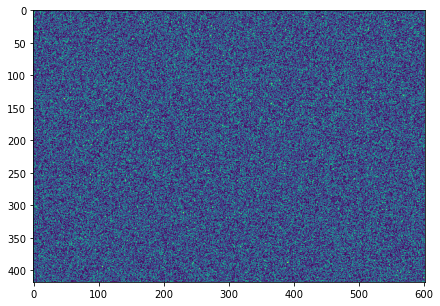

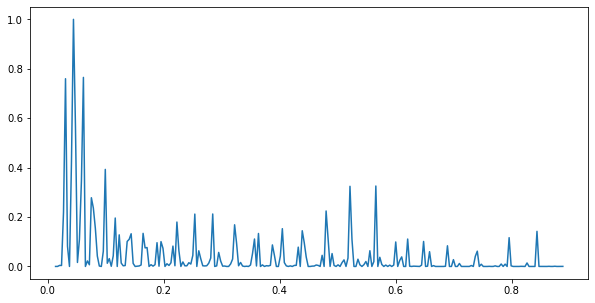

ORIGINAL
0.9733333333333334
0.23474916297422432
362160
0.8705882352941177
0.011764705882352941


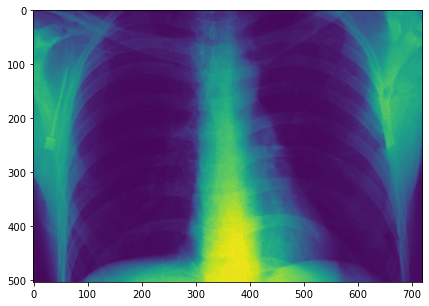

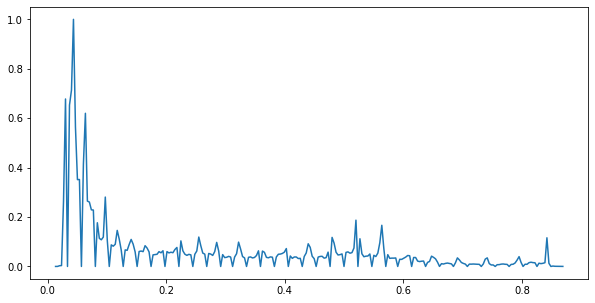

cumulative


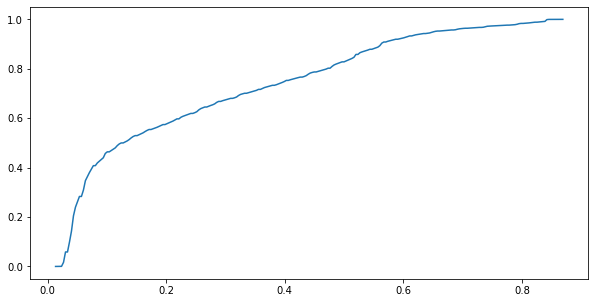

SHUFFLED
0.9733333333333334
0.23474916297422432
362160
0.8705882352941177
0.011764705882352941


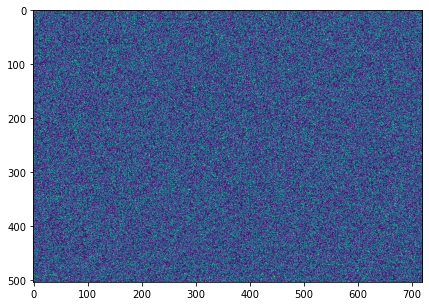

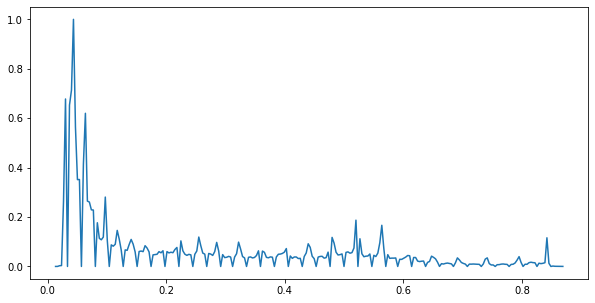

ORIGINAL
1.0
0.5563401609460553
295800
0.9921568627450981
0.0


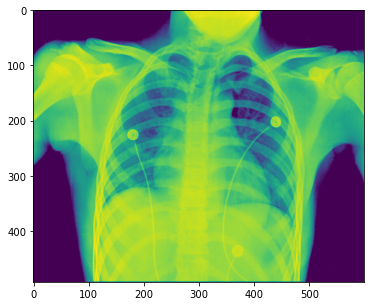

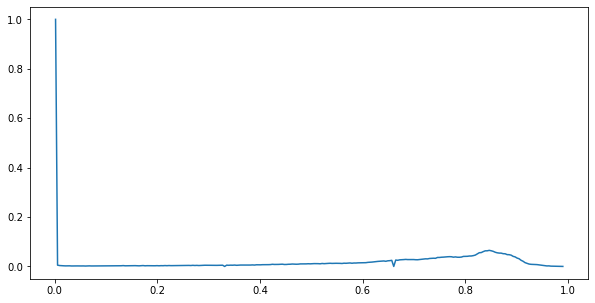

cumulative


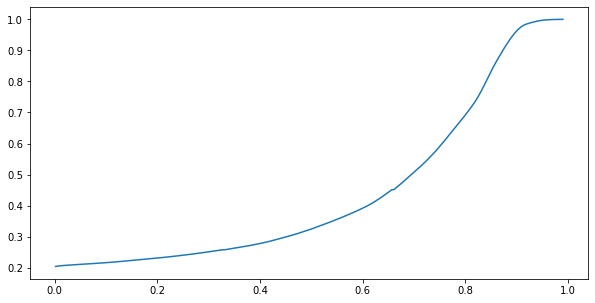

SHUFFLED
1.0
0.5563401609460553
295800
0.9921568627450981
0.0


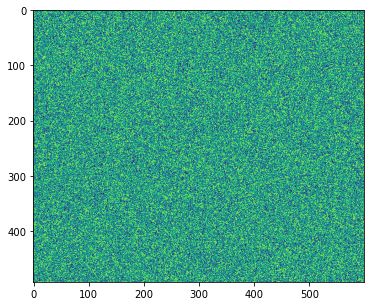

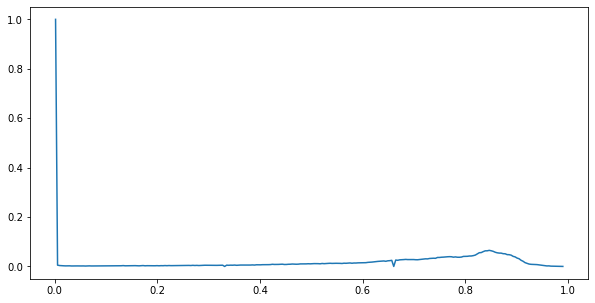

ORIGINAL
0.8339350180505416
0.558506496366551
3089540
0.996078431372549
0.09019607843137255


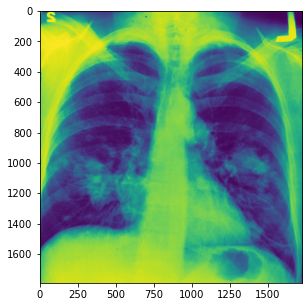

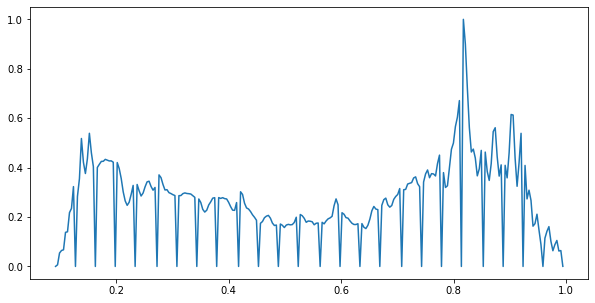

cumulative


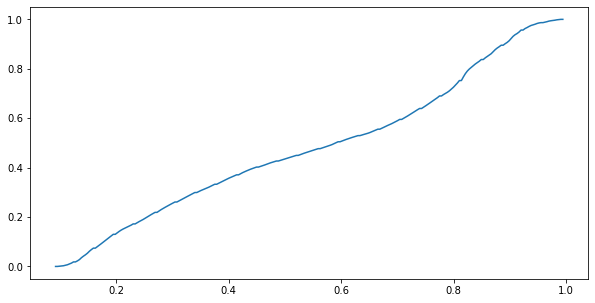

SHUFFLED
0.8339350180505416
0.5585064963665511
3089540
0.996078431372549
0.09019607843137255


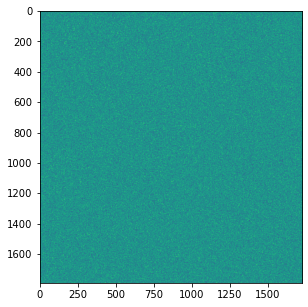

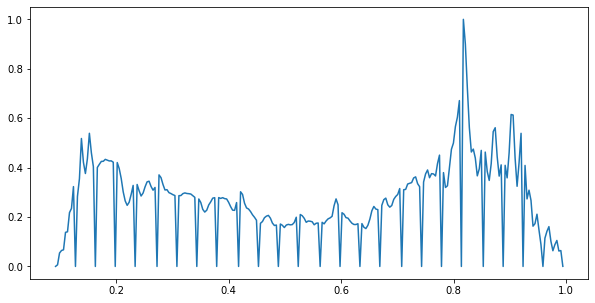

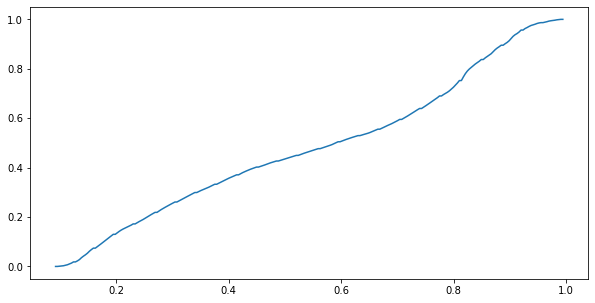

In [23]:
# Loop over the images here

SUBDIR = os.path.join (IMDIR,r"C:\Users\maria\DataSim\ATRIM\TP1-code-and-images\TP1-code-and-images\chestXray") #"/Replace/With/Your/Filepath"

if os.path.exists(SUBDIR)==0:
  print ('SUBDIR does not exist')

#Images in chestXRay have unusual min and max values good for training normalizations

#The following lines control how big the images are shown on the screen
width=10
height=5
plt.rcParams['figure.figsize'] = [width, height]

#and look for all available image files in SUBDIR

for root, dirnames, filenames in os.walk(SUBDIR):
    for filename in filenames:
        f = os.path.join(root, filename)

        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):

            # uncomment the next line to print the file paths if no image is being shwon
            # print(f)

            # read the image
            im = io.imread(f,as_gray=True)
            
            
            # convert and normalize the image
            im.astype(float)
            im = im/255
            

            # shuffle the image
            ims = shuffle_image(im)


            print('ORIGINAL')
            # call the created functions to compute and print the image properties
            contrast_original = contrast(im);
            luminancet_original = luminance(im);
            print(contrast_original)
            print(luminancet_original)
            print(np.size(im))
            print(np.max(im))
            print(np.min(im))
            plt.imshow(im)
            plt.show()

           
            # call the created functions to display the histogram and cummulative histogram
            hist_original = image_histogram(im, plot_me=True)
            plt.show()
            print('cumulative')
            hist_cum_original =cummulative_histogram(im, plot_me=True)
            plt.show()

            print('SHUFFLED')
            # call the created functions to compute and print the image properties
            constrat_shuffled = contrast(ims);
            luminancet_shuffled = luminance(ims);
            print(constrat_shuffled)
            print(luminancet_shuffled)
            print(np.size(ims))
            print(np.max(ims))
            print(np.min(ims))
            plt.imshow(ims)
            plt.show()

            # call the created functions to display the histogram and cummulative histogram
            hist_s = image_histogram(ims, plot_me=True)
            plt.show()
            hist_cum_s =cummulative_histogram(ims, plot_me=True)

            

plt.show()




### 1.2 PSNR
**a)** Create a function that computes the Peak SNR (PSNR) of a noisy image given a reference image.


**b)** Using the global measures (min, max, luminance, contrast, histogram, cumulative histogram) above, AND the PSNR. What can you say about the image quality of the images in the ``psnr'' folder? Use the 'einstein.png' image as reference for the PSNR calculation.  Are the MSE and PSNR always coherent?

Hint:  Discuss the results by groups:

-the gaussian-var**.tif images

-the speckle-var**.tif images

-the blur, contrast, impulse (salt and pepper noise) and jpeg (jpeg compressed) images


In [49]:
SUBDIR = os.path.join(IMDIR,r"C:\Users\maria\DataSim\ATRIM\TP1-code-and-images\TP1-code-and-images\psnr")#"/Replace/With/Your/Filepath"
if os.path.exists(SUBDIR)==0:
  print ('SUBDIR does not exist')

def MSE(noisy_image, ref_image):
    return np.mean((ref_image - noisy_image)**2)

def PSNR(noisy_image, ref_image):
    max = np.max(noisy_image)
    MSE = fMSE(noisy_image, ref_image)
    PSNR = 20*np.log(max/np.sqrt(MSE))
    return PSNR




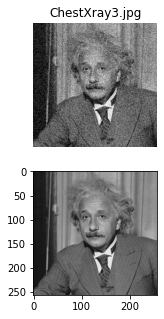

contrast_original: 1.0
0.0015838516558753784
65536
0.00392156862745098
0.0
PSNR_gv1:46.2811158639703
MSE:1.5029907768291195e-07
1.0
0.0016006064688629809
65536
0.00392156862745098
0.0
-94.09790538660434
1.0
0.403828228639481
65536
1.0
0.0
53.15648718853775


In [52]:
#the gaussian-var**.tif images
im = io.imread(r"C:\Users\maria\DataSim\ATRIM\TP1-code-and-images\TP1-code-and-images\psnr\gaussian-var01.tif",as_gray=True)
imr = io.imread(r"C:\Users\maria\DataSim\ATRIM\TP1-code-and-images\TP1-code-and-images\psnr\einstein.png",as_gray=True)


 # convert and normalize the image
im.astype(float)
im = im/255
imr.astype(float)
imr = imr/255

#create figure
fig = plt.figure()

# display it
plt.subplot(2,1,1)
plt.imshow(im, cmap='gray')
plt.title(filename)
plt.axis('off')
plt.subplot(2,1,2)
plt.imshow(imr, cmap='gray')

plt.show()

PSNR_gv1 = PSNR(im,imr)
MSE_gv1 = MSE(im,imr)
contrast_original = contrast(im);
luminancet_original = luminance(im);
print(f"contrast_original: {contrast_original}")
print(luminancet_original)
print(np.size(im))
print(np.max(im))
print(np.min(im))
print(f"PSNR_gv1:{PSNR_gv1}")
print(f"MSE:{MSE_gv1}")

im = io.imread(r"C:\Users\maria\DataSim\ATRIM\TP1-code-and-images\TP1-code-and-images\psnr\gaussian-var03.tif",as_gray=True)
imr = io.imread(r"C:\Users\maria\DataSim\ATRIM\TP1-code-and-images\TP1-code-and-images\psnr\einstein.png",as_gray=True)
 # convert and normalize the image
im.astype(float)
im = im/255

PSNR_gv1 = PSNR(im,imr)
contrast_original = contrast(im);
luminancet_original = luminance(im);
print(contrast_original)
print(luminancet_original)
print(np.size(im))
print(np.max(im))
print(np.min(im))
print(PSNR_gv1)

im = io.imread(r"C:\Users\maria\DataSim\ATRIM\TP1-code-and-images\TP1-code-and-images\psnr\gaussian-var005.tif",as_gray=True)
imr = io.imread(r"C:\Users\maria\DataSim\ATRIM\TP1-code-and-images\TP1-code-and-images\psnr\einstein.png",as_gray=True)
PSNR_gv1 = PSNR(im,imr)
contrast_original = contrast(im);
luminancet_original = luminance(im);
print(contrast_original)
print(luminancet_original)
print(np.size(im))
print(np.max(im))
print(np.min(im))
print(PSNR_gv1)

            

# 2. Intensity transformations and their transfer functions

### 2.1 Color to grayscale and grayscale to black and white
**(a)** Create a function that receives as input a color image and transforms it to grayscale. Read the image **outside** the function. Apply the function to the ```ballons.jpg``` image.

**(b)** Create a function that reads a grayscale image and given a parameter ```k``` implements a threshold function and provides. Apply and show the result on the ```threshold.jpg``` image. Show the results for various k. **Hint**: you may want to use the ```np.where``` function

**Advanced**: you may want to use the ```interact``` functionalities from the ipywidgets module
```
from ipywidgets import interact
import ipywidgets as widgets
```
to create a sliding bar for the threshold parameter or the color saturation

In [ ]:
# define functions here

In [ ]:
# call functions here





### 2.2 Graylevel transformations and transfer functions

Implement the following graylevel transformations as independent functions. Then apply the functions to the images in the ``histograms`` folder.

**a)** Implement a generic linear transformation parameterized by a and b such that its transfer function has the form ```f(x) = a x + b```

**b)** Implement a function that inverts the image intensities

**c)** Implement one of the nonlinear parametric transfer functions (normalization with saturation, contrast stretching, gamma, ...)

**(d)** Plot the transfer functions for all transformations in (a) to (d)

**(e)** Loop over the images in the folder and display the results for each image:
- The original and the transformed images.
- The transfer function
- The original and transformed histogram.

**Hints**
- set the horizontal limits fo the histograms to a fix size e.g. ```set_lim([0 255])```
- Make sure that the histograms associated to a single figure have comparable vertical axis limits.

**(f)** Describe the relations between the images and histograms with respect to the transfer functions in each case

In [ ]:
# define functions

In [ ]:
# Show the transfer functions


In [ ]:
# Loop over images

2.3 Histogram equalization

**a)** Implement the histogram equalization algorithm and apply it to the images in the ``equalization`` folder. Display the original and the equalized image, the original and the equalized histograms, as well as the original and equalized **cumulative** histograms.

**b)** Write down a comment about your findings** Explain the resulting images, as well as the shape of the histograms and cumulative histograms before and after the transformation.  Why does it make sense to use the cumulative histogram as a transformation?

**c)** Apply the algorithm to different images and plot the transformed cumulative histogram. What do you observe?


In [ ]:
SUBDIR = os.path.join(IMDIR,"equalize")
if os.path.exists(SUBDIR)==0:

  print ('SUBDIR does not exist')





## 3.0 Morphological operations


Loop over the images in the ```morphology``` folder. Apply the following morphological operations to the images by first converting them to grayscale:

**a)** erosion

**b)** dilation

**c)** closure

**d)** opening

**e)** border extraction

**f)** Apply the filters to the original gray scale images.
- Explain the results for the binary as well as for the grayscale images.
- What is the effect of the structuring element shape?

Hints: use the scikit help for morphological operations.  For instance to declare an structuring element use
```python
# declare an structuring elment
selem = disk(6)
# apply a scipy morphological operation
eroded_im = erosion(im, selem)
```


**BONUS** implement your own erosion and dilation functions.

In [ ]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk

SUBDIR = os.path.join(IMDIR,"/morphology")
if os.path.exists(SUBDIR)==0:
  print ('SUBDIR does not exist')


